## Logistic regression with ROC curve and ROC AUC score

In [8]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# Generate a no-skill probability prediction (Majority class)
dummy_model_prob = [0 for _ in range(len(y_test))]

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [12]:
# Model prediction probabilities
model_prob = model.predict_proba(X_test)
model_prob.shape

(250, 2)

In [13]:
# Let's focus on only positive outcomes
model_prob = model_prob[:, 1]

In [14]:
# Calculate the ROC AUC score
dummy_model_auc = roc_auc_score(y_test, dummy_model_prob)
model_auc = roc_auc_score(y_test, model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9108885464817668


### ROC Curve
This gives 2 values
- False Positive Rate
- True Positive Rate
### FPR = FP/N = FP/(FP + TN)
- FP - Number of False Positives
- TN - Number of True Negatives
- N - Total number of Negatives
### TPR = TP/P = TP/(TP + FN) = 1 - FNR (This is also called as Sensitivity, Hit Rate)
- TP - Number of True Positives
- FN - Number of False Negatives
- P - Total number of Positives
Plotting FPR on X-axis & TPR on Y-axis will give the ROC curve

In [15]:
# Calculate ROC curve for dummy model and actual model
dummy_fpr, dummy_tpr, _ = roc_curve(y_test, dummy_model_prob)
model_fpr, model_tpr, thresholds = roc_curve(y_test, model_prob)

In [16]:
thresholds[0] = 1
thresholds

array([1.00000000e+00, 9.99738397e-01, 9.87033757e-01, 9.86362468e-01,
       9.57744551e-01, 9.57101721e-01, 9.45385188e-01, 9.40463485e-01,
       9.28300276e-01, 9.27356342e-01, 9.25607881e-01, 9.23728474e-01,
       8.94744248e-01, 8.94036983e-01, 8.43395917e-01, 8.38396411e-01,
       8.28791784e-01, 8.26684852e-01, 8.08489957e-01, 8.06352720e-01,
       7.80393330e-01, 7.63976766e-01, 7.63705186e-01, 7.63537905e-01,
       7.58496683e-01, 7.55347574e-01, 7.52623720e-01, 7.48020931e-01,
       7.23488083e-01, 7.23238629e-01, 6.74619385e-01, 6.56791269e-01,
       6.55162225e-01, 6.26882105e-01, 5.99962989e-01, 5.57931518e-01,
       5.39053079e-01, 5.14219160e-01, 5.05342549e-01, 4.96278090e-01,
       4.90154702e-01, 4.85201910e-01, 4.69275954e-01, 4.50983178e-01,
       4.46563018e-01, 4.39872005e-01, 4.24245353e-01, 3.24715881e-01,
       3.12906913e-01, 3.06694053e-01, 3.01325247e-01, 2.10358834e-01,
       2.06296724e-01, 1.91030219e-01, 1.69877066e-01, 1.42771985e-01,
      

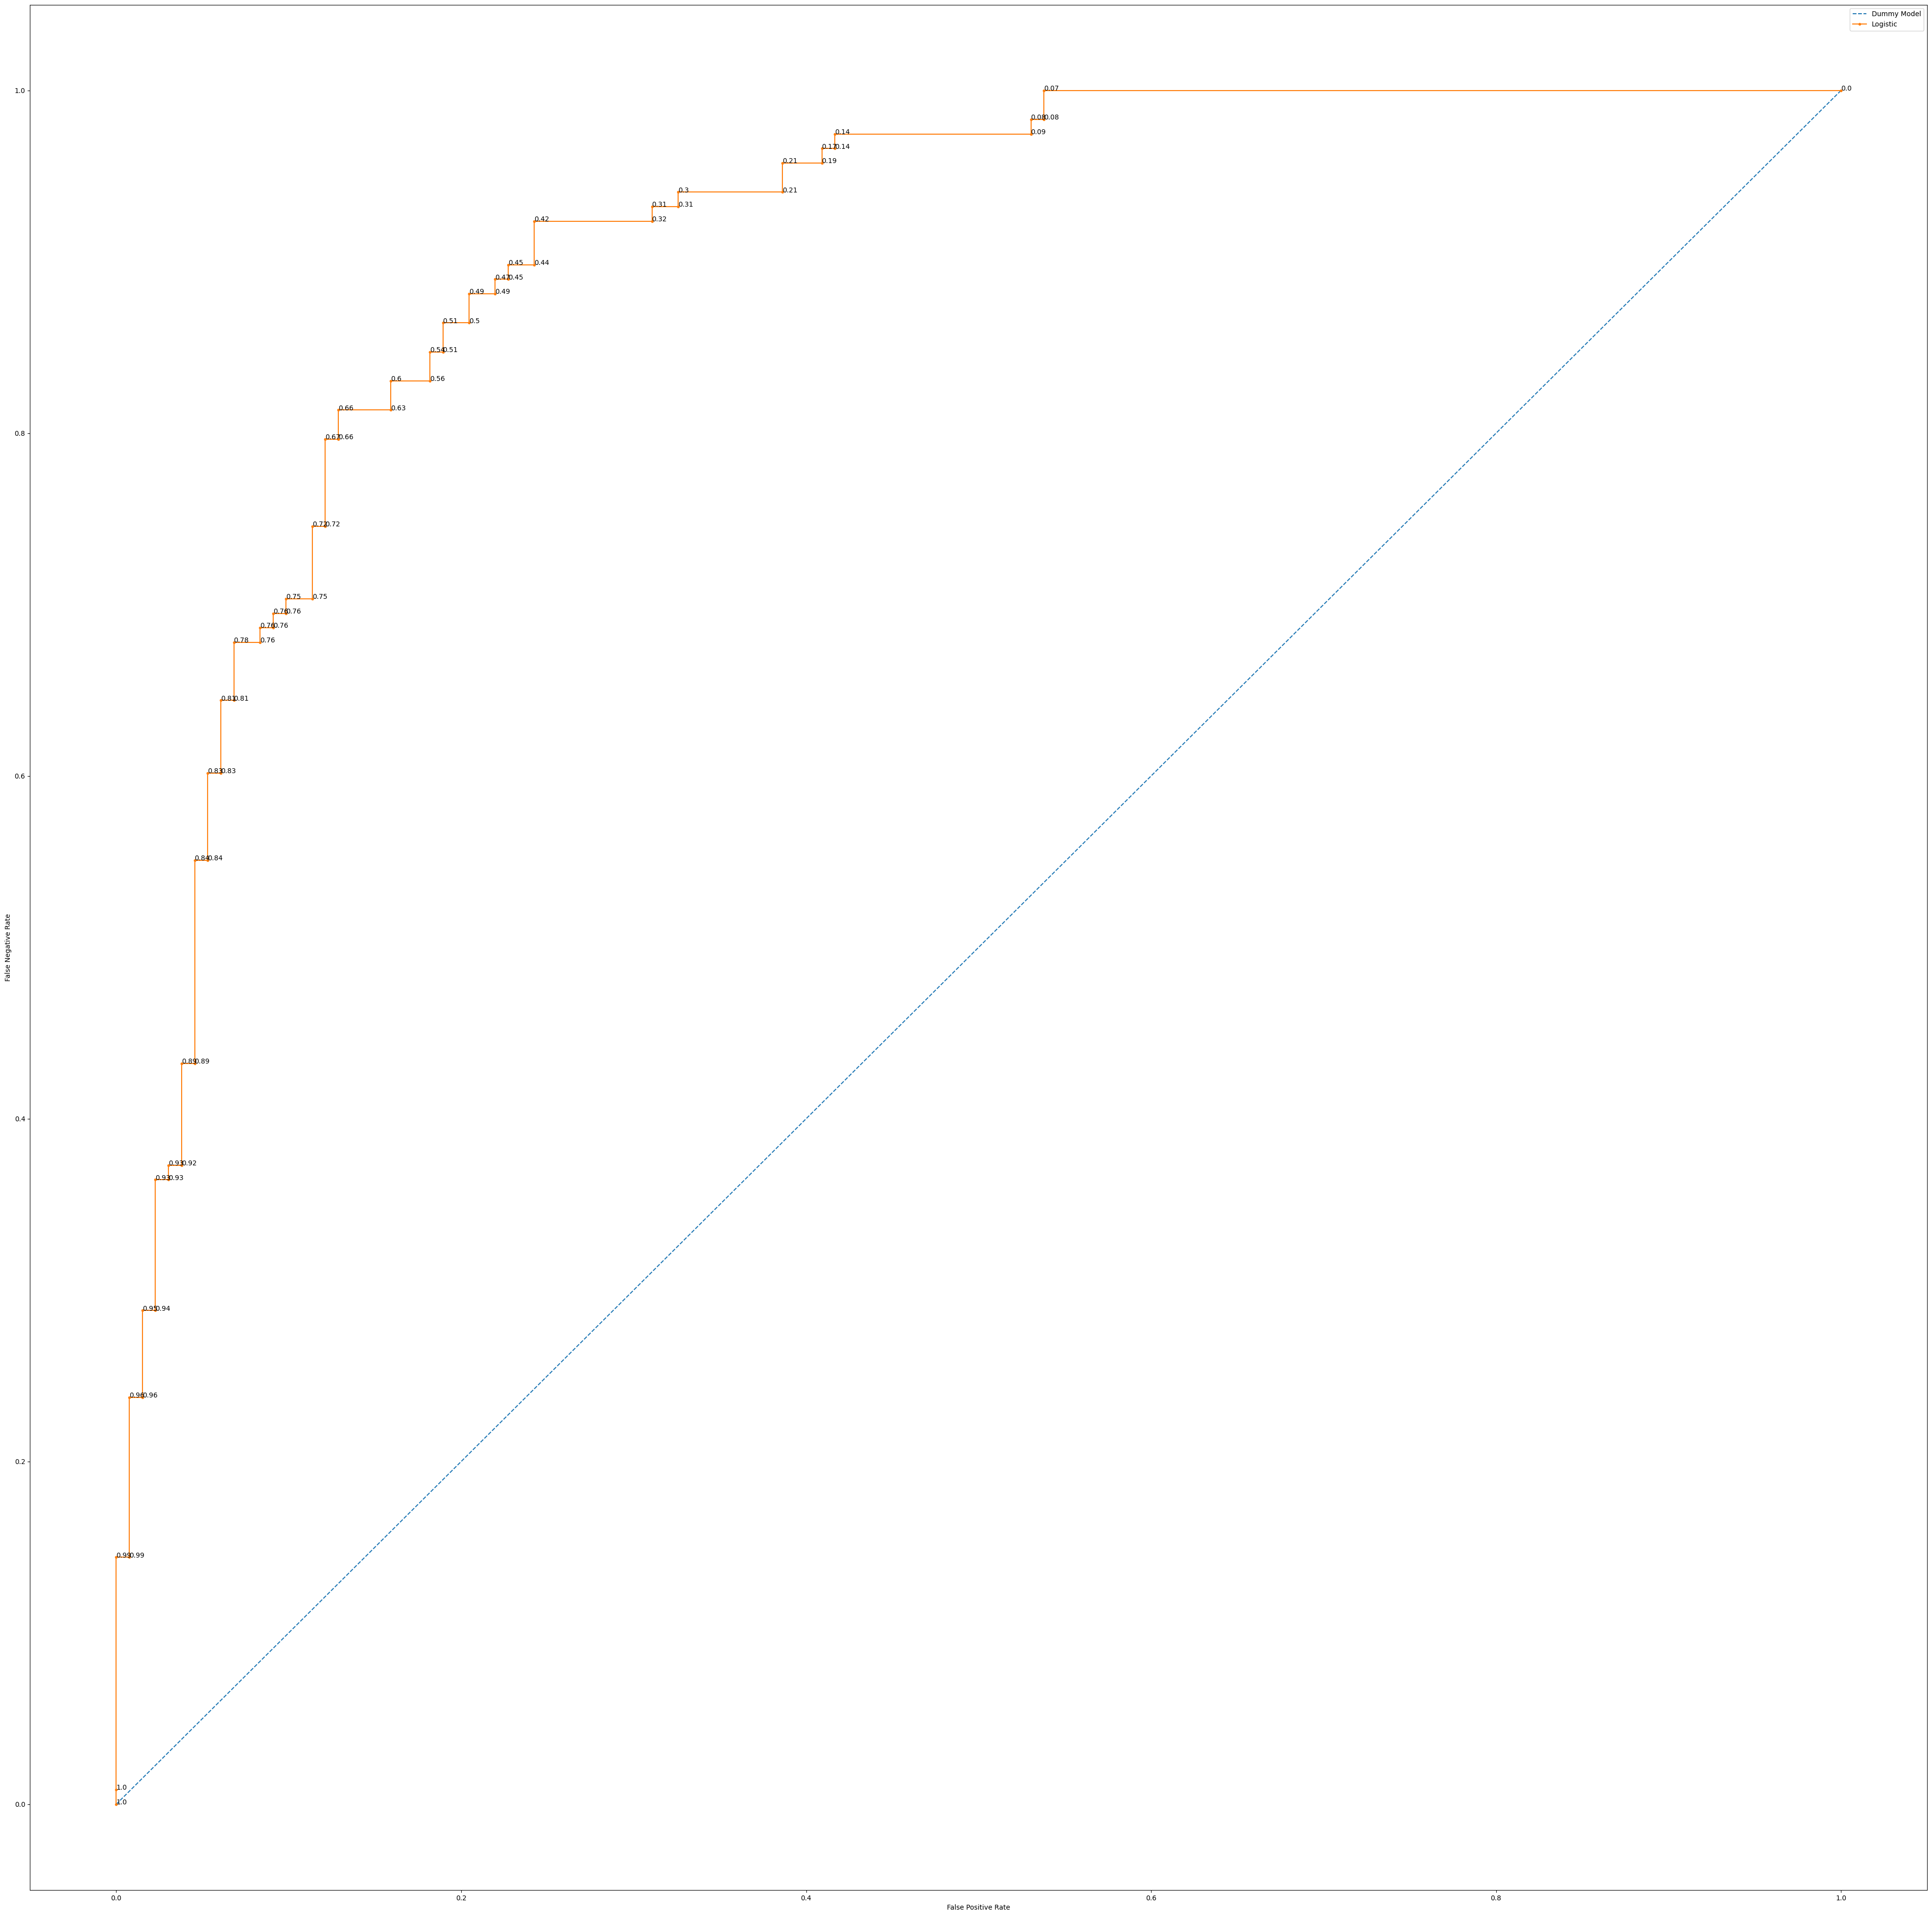

In [17]:
import matplotlib.pyplot as plt
# Plot the ROC Curve
plt.figure(figsize=(50, 50))
plt.plot(dummy_fpr, dummy_tpr, linestyle='--', label="Dummy Model")
plt.plot(model_fpr, model_tpr, marker='.', label="Logistic")
for xyz in zip(model_fpr, model_tpr, thresholds):
    plt.annotate(f"{round(xyz[2], 2)}", xy=(xyz[0], xyz[1]))
plt.xlabel("False Positive Rate")
plt.ylabel("False Negative Rate")
plt.legend()
plt.show()